In [10]:
# 300 개 프레임의 평균값을 뺀 이미지 저장

import random, json, shutil
import imageio, xmltodict, cv2, shutil
from IPython.display import HTML, Video
from tqdm.auto import tqdm
from pathlib import Path
from PIL import Image

In [11]:
# 랜덤하게 보기
REL_ROOT = '/data1/IMG-1920/'
sub_dir  = lambda d: [f for f in Path(d).iterdir() if f.is_dir()]
sub_file = lambda d, suffix: [f for f in Path(d).iterdir() if f.suffix==suffix] 
   
clips = sub_dir(REL_ROOT)
clips = [(c.name, sorted(sub_file(c, '.jpg'))) for c in clips]
print('len(clips):', len(clips))
err_clips = []
for c, fs in clips:
    if len(fs) != 300:
        #print(len(fs), c)
        err_clips.append((c, fs))
print(len(err_clips))

len(clips): 823
0


In [375]:
import numpy as np
def mean_img(fs):
    pass
c, fs = random.choice(clips)
fs = np.stack([cv2.imread(str(f))[:,:,[2,1,0]] for f in tqdm(fs)])
fs.shape

(300, 1080, 1920, 3)

In [ ]:
#print(list(range(0,300,60)))
r = list(range(0,300,60))
background = np.zeros((288,512,3))
for i in range(len(r)): # [0, 60, 120, 180, 240]
    others = r[:i] + r[i+1:]
    target = r[i]
    masks = []
    print(others, target)
    for j in others:
        backSub = cv2.createBackgroundSubtractorMOG2()
        index = list(range(j,j+1)) + [target]
        small_image = [Image.fromarray(f) for f in fs[index]]
        _ = [f.thumbnail((512,512)) for f in small_image]
        temp_masks = [backSub.apply(np.array(f)) for f in small_image]
        masks.append(((temp_masks[-1] > 100)).astype(np.float))
    #for k in range(len(masks)):
    #    display(Image.fromarray((masks[k]*255).astype(np.uint8)))
    mask = np.array(masks).mean(0)
    #print(mask.shape)
    #display(Image.fromarray((mask*255).astype(np.uint8)))
    #max_mask_value = mask[mask>0].min()
    max_mask_value = mask.mean()
    #print(max_mask_value)
    mask_max = mask >= max_mask_value
    #display(Image.fromarray((mask_max*255).astype(np.uint8)))
    cur_image = Image.fromarray(fs[target]).resize((mask_max.shape[1], mask_max.shape[0]))
    #display(Image.fromarray(((mask_max == 0)*255).astype(np.uint8)))
    blur = cv2.GaussianBlur(mask_max,(5,5),0)
    #display(Image.fromarray(blur.astype(np.uint8)))
    ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    background[th3 == 0] = np.array(cur_image)[th3 == 0]
    #display(Image.fromarray(background.astype(np.uint8)))
        
background = Image.fromarray(background.astype(np.uint8))
#background = background.resize((1920,1080))
display(background)

In [347]:

target = random.randint(0,299)
backSub = cv2.createBackgroundSubtractorMOG2()

masks = []
#print(list(range(0,300,60)))
for i in range(0,300,60): # [0, 60, 120, 180, 240]
    backSub = cv2.createBackgroundSubtractorMOG2()
    index = list(range(i,i+10)) + [target]
    small_image = [Image.fromarray(f) for f in fs[index]]
    _ = [f.thumbnail((512,512)) for f in small_image]
    temp_masks = [backSub.apply(np.array(f)) for f in small_image]
    masks.append(((temp_masks[-1] > 100)).astype(np.float))
masks[-1].shape, target

((288, 512), 166)

1.0


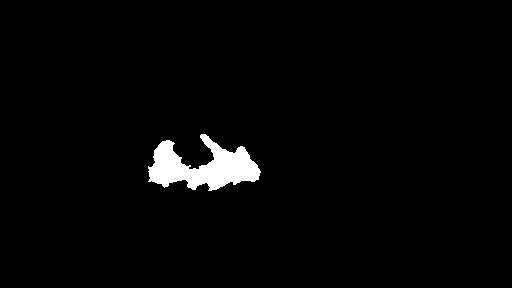

(1080, 1920)


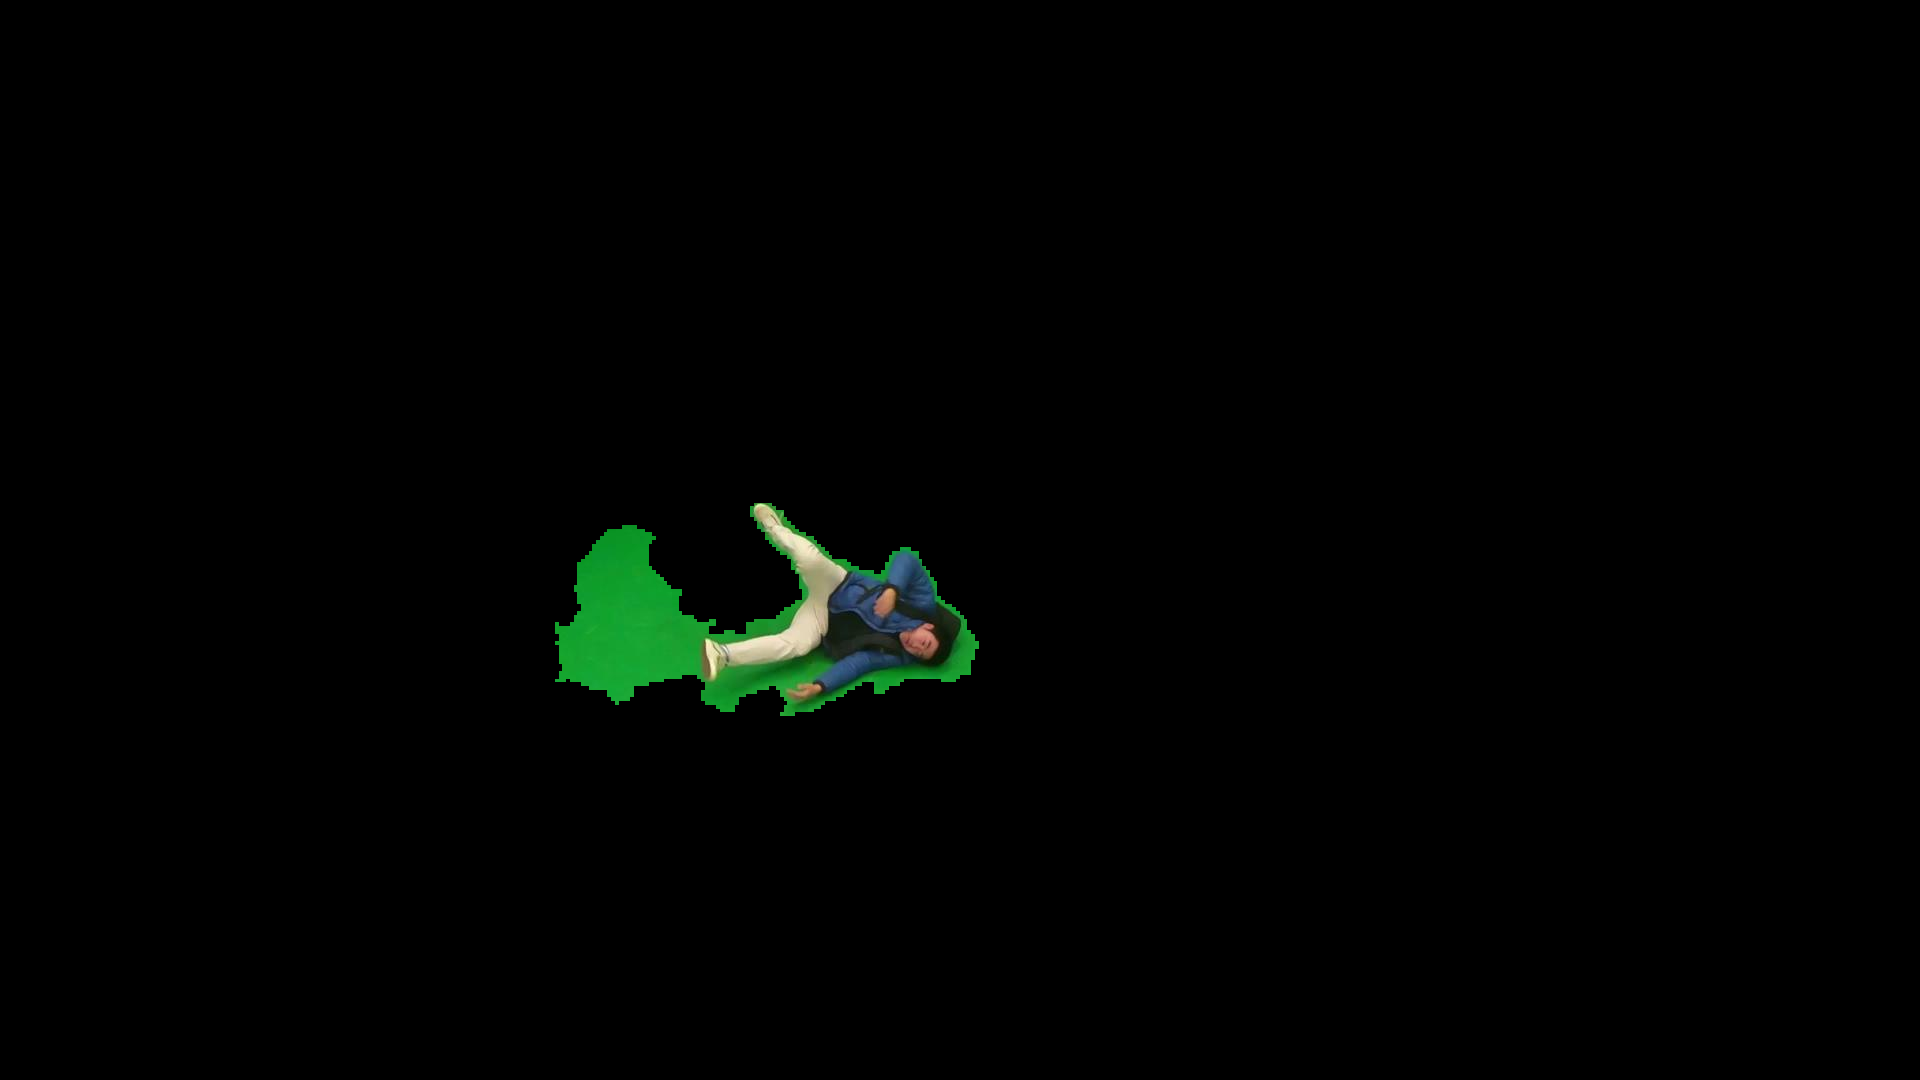

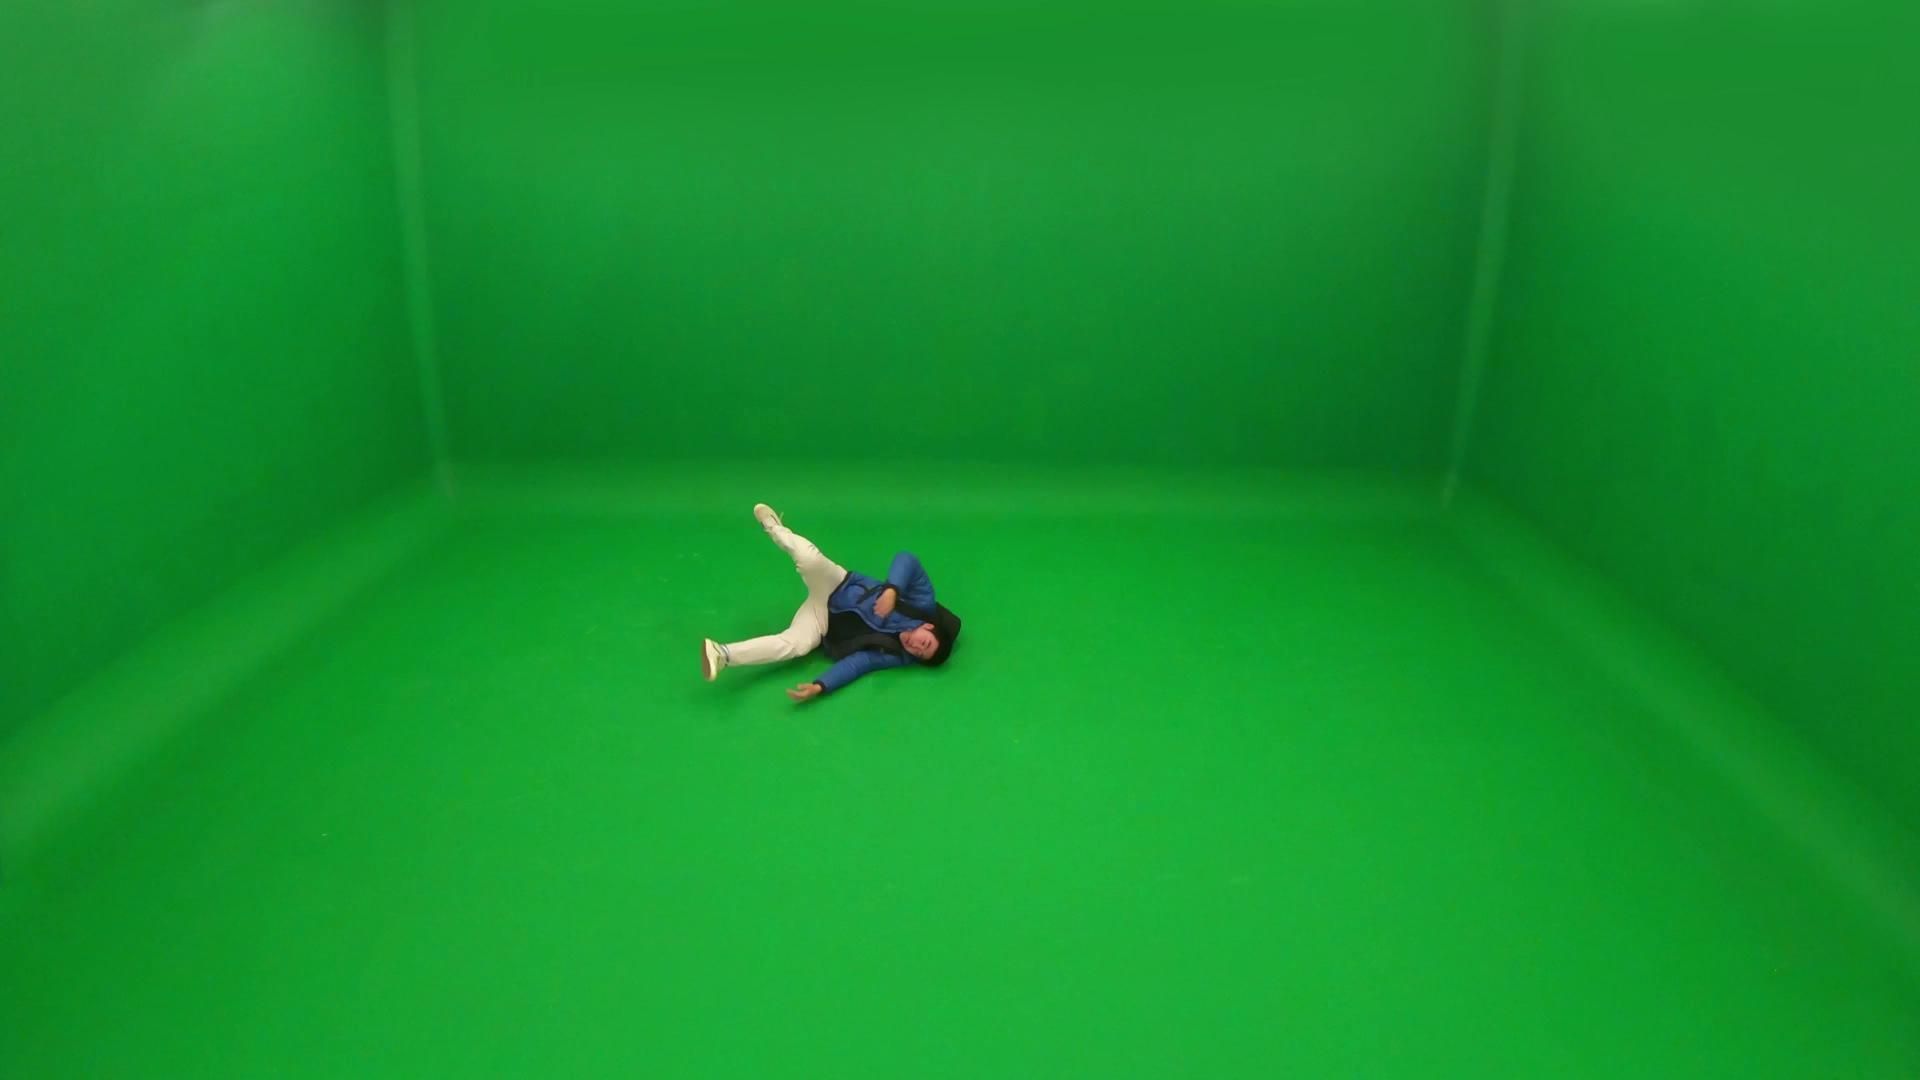

In [296]:
import cv2 as cv

#for i in range(len(masks)):
#    display(Image.fromarray((masks[i]*255).astype(np.uint8)))

mask = np.array(masks).mean(0)
print(mask.max())
max_mask_value = min(float(mask.max()), 0.5) # 5개랑 비교하니까 3개 이상? (mask>0).mean()
mask_max = ((mask >= max_mask_value)*255).astype(np.uint8)
mask_max = Image.fromarray(mask_max)
#mask_max.thumbnail((224, 224))
mask_max = np.array(mask_max)
# Otsu's thresholding after Gaussian filtering
#display(Image.fromarray(mask_max))
blur = cv2.GaussianBlur(mask_max,(5,5),0)
#display(Image.fromarray(blur.astype(np.uint8)))
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
display(Image.fromarray(th3.astype(np.uint8)))
mask_max = Image.fromarray(th3.astype(np.uint8))
mask_max = mask_max.resize((1920, 1080), Image.NEAREST)
mask_max = np.array(mask_max) > 0
print(mask_max.shape)


# #or i in range(len(masks)):
# #   display(Image.fromarray((masks[i]*255).astype(np.uint8)))
mask_f = mask_max.reshape(1080,1920,1)
#print((mask_max == 0).sum(), (mask_max == 1).sum(), (mask_max == 0).sum()+ (mask_max == 1).sum(), 1080*1920)

#display(Image.fromarray(mask_f.reshape(1080,1920).astype(np.uint8)*255))
display(Image.fromarray((fs[target] * (mask_f))))
display(Image.fromarray(fs[target].astype(np.uint8)))
# Image.fromarray(fs[-1])


In [203]:
fs = fs.astype(np.float)

In [112]:
rate = 1.0 
mean = fs[:].mean(axis=0)
diff_first = np.abs((fs[5] - mean*rate)).astype(np.uint8)
diff_last  = np.abs((fs[-5] -mean*rate)).astype(np.uint8)

(300, 1080, 1920) (1080, 1920)


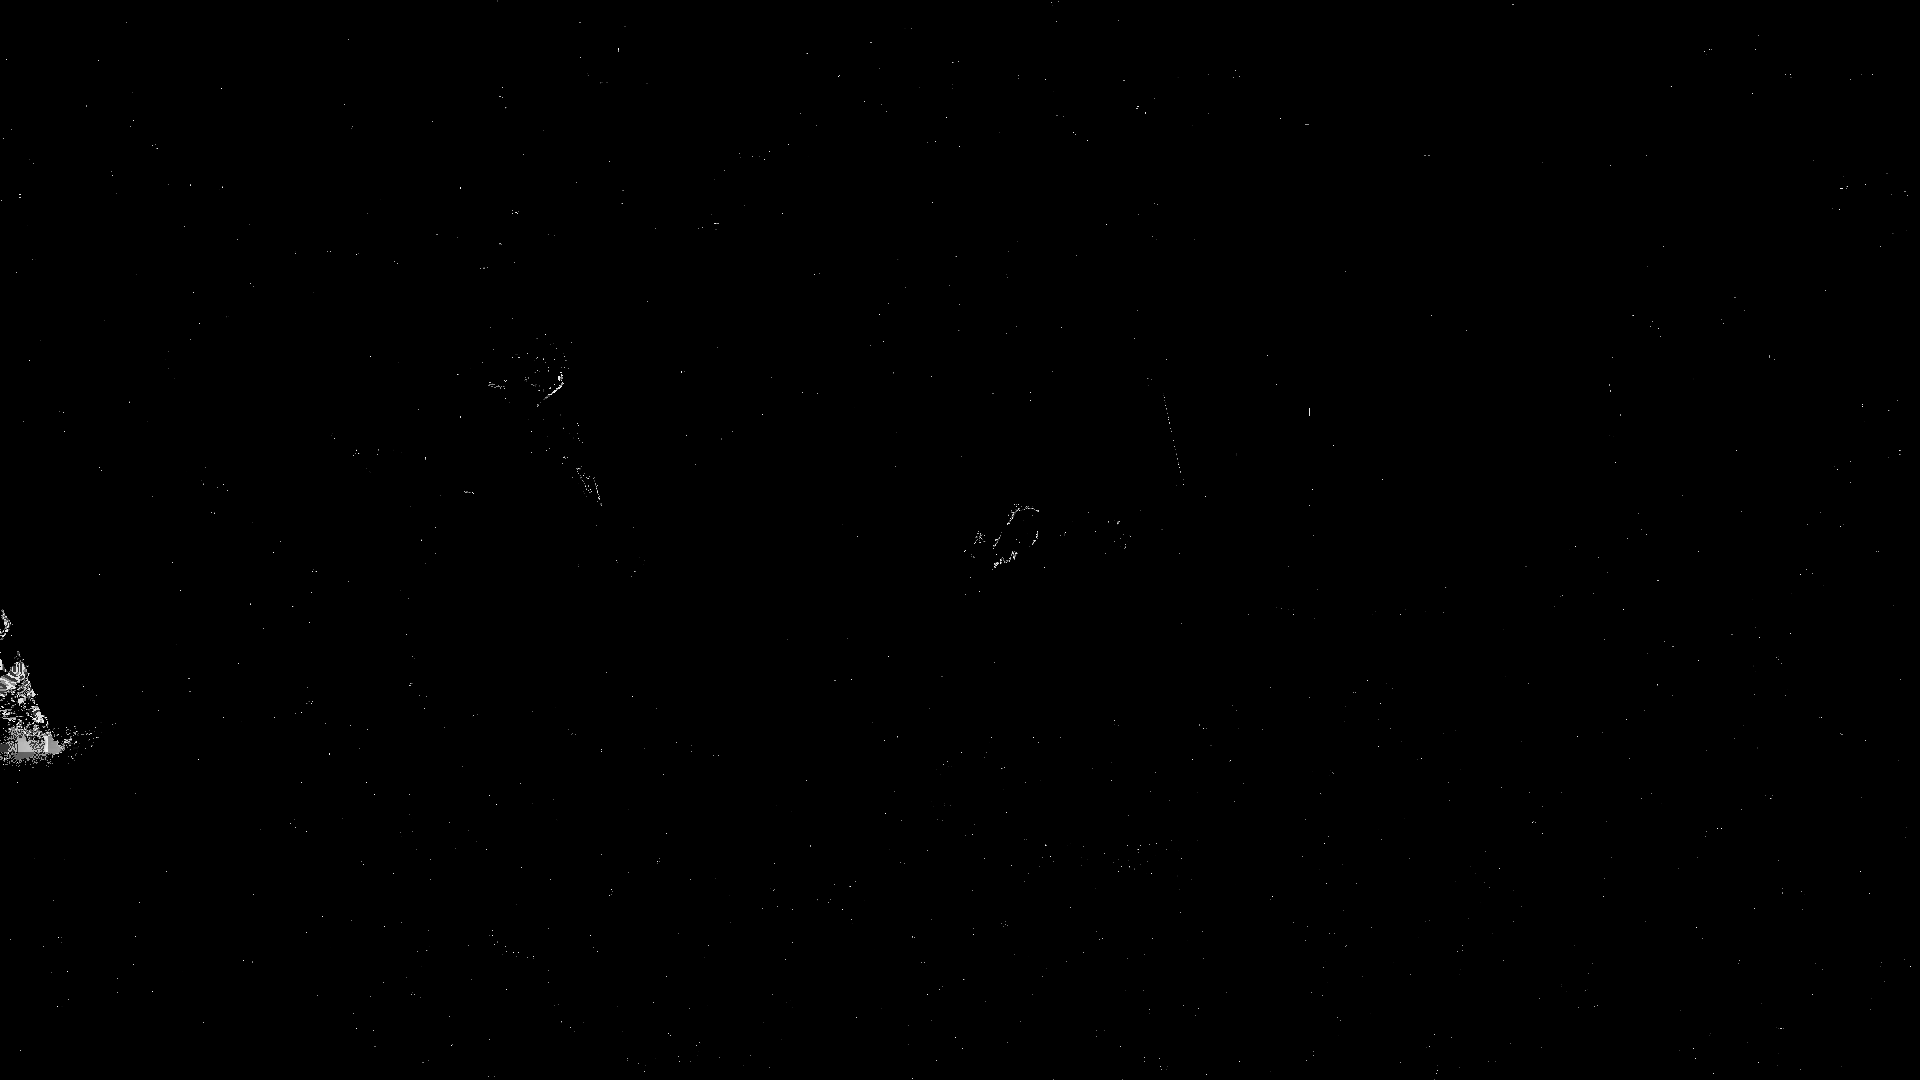

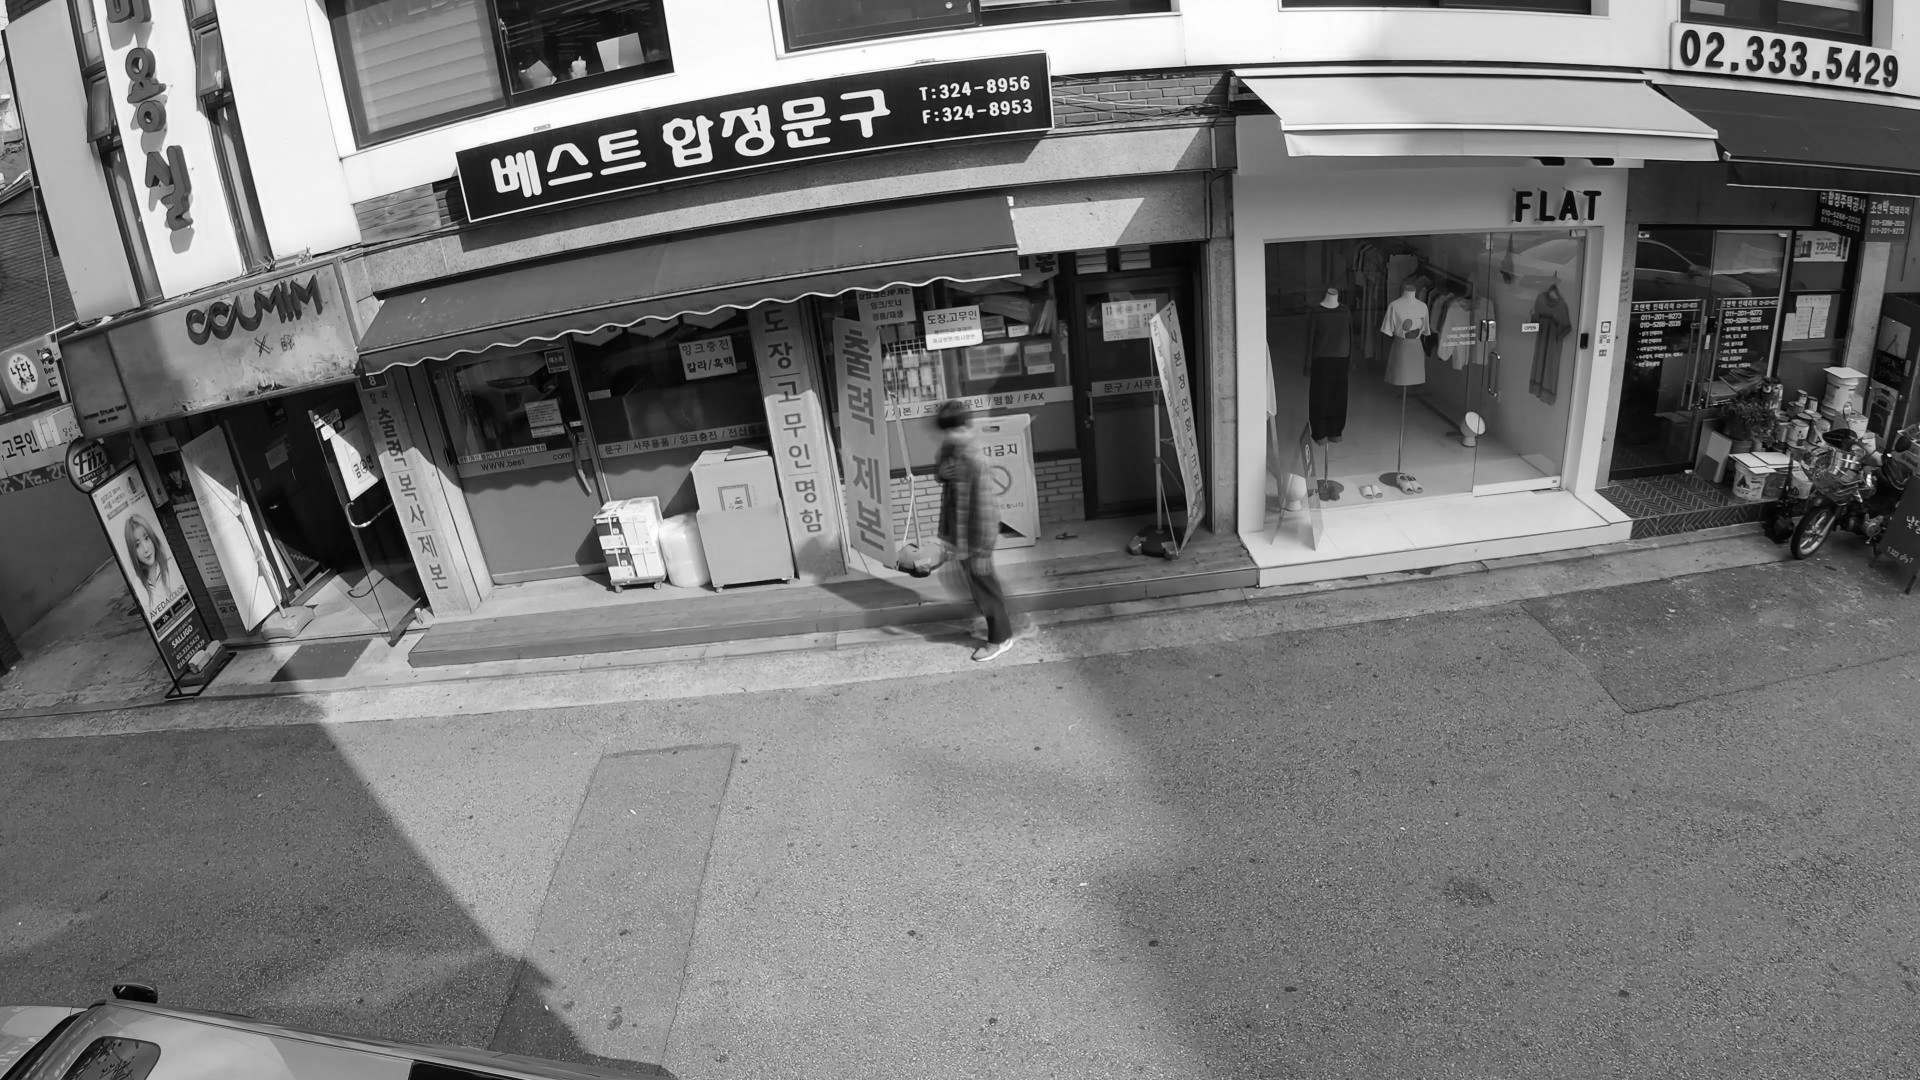

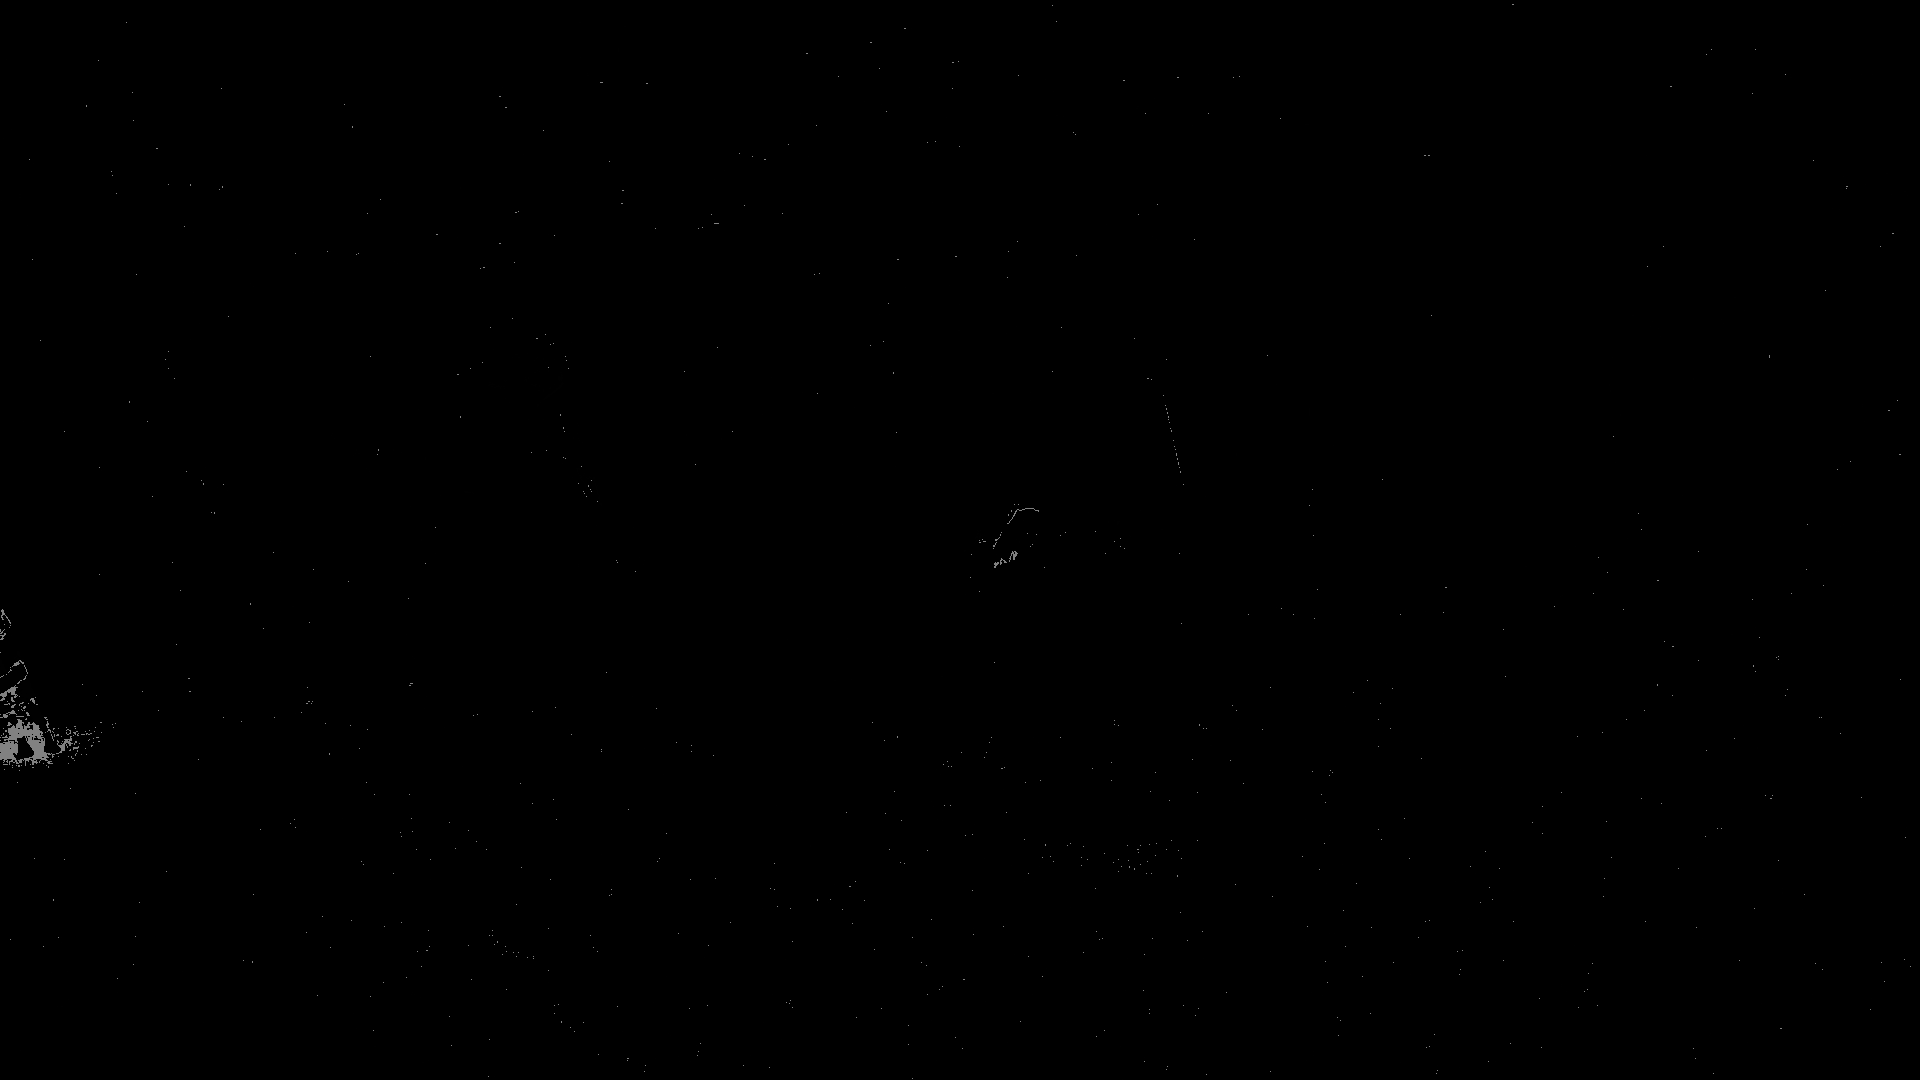

In [130]:
th = 10 


#display(Image.fromarray(diff_first))
#display(Image.fromarray(diff_last))
#display(Image.fromarray(mean.astype(np.uint8)))
#mask = np.std(fs, 0) > th 
print(fs.shape, mask.shape)
display(Image.fromarray((fs[-5]*(mask)).astype(np.uint8)))
display(Image.fromarray(mean.astype(np.uint8)))
display(Image.fromarray((mask*255).astype(np.uint8)))
